<a href="https://colab.research.google.com/github/Zennifer92/DFU_Project/blob/main/MACROPHAGE_all_group__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
if (!requireNamespace("data.table", quietly = TRUE)) install.packages("data.table")
if (!requireNamespace("R.utils", quietly = TRUE)) install.packages("R.utils")
if (!requireNamespace("umap", quietly = TRUE)) install.packages("umap")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("BiocManager", quietly = TRUE)) install.packages("BiocManager")
if (!requireNamespace("DESeq2", quietly = TRUE)) BiocManager::install("DESeq2")
install.packages("tidyverse")
install.packages("reshape2")
install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load the libraries
library(data.table)
library(R.utils)
library(DESeq2)
library(ggplot2)
library(umap)
library(ggrepel)
library(tidyverse)
library(reshape2)

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.26.0 (2024-01-24 05:12:50 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.3 (2023-11-18 01:00:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, use, warnings


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The followin

In [3]:
#   Data plots for selected GEO samples

# load counts table from GEO
urld <- "https://www.ncbi.nlm.nih.gov/geo/download/?format=file&type=rnaseq_counts"
path <- paste(urld, "acc=GSE144990", "file=GSE144990_raw_counts_GRCh38.p13_NCBI.tsv.gz", sep="&");
tbl <- as.matrix(data.table::fread(path, header=T, colClasses="integer"), rownames=1)


In [4]:
dim(tbl)

[1] 39376    76

In [5]:
# load gene annotations
apath <- paste(urld, "type=rnaseq_counts", "file=Human.GRCh38.p13.annot.tsv.gz", sep="&")
annot <- data.table::fread(apath, header=T, quote="", stringsAsFactors=F, data.table=F)
rownames(annot) <- annot$GeneID

In [6]:
# Convert matrix to data frame for ggplot
data_df <- as.data.frame(tbl)
data_df$gene <- rownames(data_df)

In [7]:
print(data_df)

          GSM4303849 GSM4303850 GSM4303851 GSM4303852 GSM4303853 GSM4303854
100287102          0          1          1          0          1          1
653635            34         33         57         61         66         50
102466751          1          1          2          1          2          1
107985730          0          0          0          0          0          0
100302278          0          0          0          0          0          0
645520             0          0          0          0          0          1
79501              0          0          0          0          0          0
100996442         16         17         18         15         27         24
729737            23         26         32         30         58         50
102725121          0          0          0          0          1          0
102723897         34         39         54         61         67         48
102465909          1          1          1          1          2          1
107985721   

In [8]:
# sample selection
gsms <- paste0("00XXXXXXXXXXXXXXXX11XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXX")
sml <- strsplit(gsms, split="")[[1]]

In [9]:
print(sml)

 [1] "0" "0" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "1"
[20] "1" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X"
[39] "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X"
[58] "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X" "X"


In [10]:
# filter out excluded samples (marked as "X")
sel <- which(sml != "X")
sml <- sml[sel]
tbl1 <- tbl[ ,sel]

In [11]:
dim(tbl1)

[1] 39376     4

In [12]:
# group membership for samples
gs <- factor(sml)
groups <- make.names(c("Con","Niclosamide"))
levels(gs) <- groups
sample_info <- data.frame(Group = gs, row.names = colnames(tbl1))

In [13]:
print(sample_info)

                 Group
GSM4303849         Con
GSM4303850         Con
GSM4303867 Niclosamide
GSM4303868 Niclosamide


In [14]:
print(tbl1)

          GSM4303849 GSM4303850 GSM4303867 GSM4303868
100287102          0          1          1          1
653635            34         33         63         57
102466751          1          1          2          0
107985730          0          0          0          0
100302278          0          0          0          0
645520             0          0          0          0
79501              0          0          0          0
100996442         16         17         21         21
729737            23         26         55         29
102725121          0          0          0          0
102723897         34         39         67         63
102465909          1          1          2          0
107985721          0          0          0          0
112268260          5          3          3          6
729759             0          0          0          0
100132287         11         12         32         14
105378947          0          1          1          1
101928626          0        

In [15]:
# pre-filter low count genes
# keep genes with at least N counts > 10, where N = size of smallest group
keep <- rowSums( tbl1 >= 10 ) >= min(table(gs))
tbl2 <- tbl1[keep, ]

In [16]:
dim(tbl2)

[1] 13235     4

In [17]:
ds <- DESeqDataSetFromMatrix(countData=tbl1, colData=sample_info, design= ~Group)

In [18]:
print(ds)

class: DESeqDataSet 
dim: 39376 4 
metadata(1): version
assays(1): counts
rownames(39376): 100287102 653635 ... 4576 4571
rowData names(0):
colnames(4): GSM4303849 GSM4303850 GSM4303867 GSM4303868
colData names(1): Group


In [19]:
# Run DESeq analysis
ds1 <- DESeq(ds, test = "Wald", sfType = "poscount")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [20]:
print(ds1)

class: DESeqDataSet 
dim: 39376 4 
metadata(1): version
assays(4): counts mu H cooks
rownames(39376): 100287102 653635 ... 4576 4571
rowData names(22): baseMean baseVar ... deviance maxCooks
colnames(4): GSM4303849 GSM4303850 GSM4303867 GSM4303868
colData names(2): Group sizeFactor


In [21]:
# extract results for top genes table
r <- results (ds1, contrast=c("Group", groups[1], groups[2]), alpha=0.05, pAdjustMethod ="fdr")

In [22]:
tg <- r[order(r$padj)[1:250],]
tg1 <- merge(as.data.frame(tg), annot, by=0, sort=F)

In [23]:
tg2 <- subset(tg1, select=c("GeneID","padj","pvalue","lfcSE","stat","log2FoldChange","baseMean","Symbol","Description"))
write.table(tg2, file=stdout(), row.names=F, sep="\t")

"GeneID"	"padj"	"pvalue"	"lfcSE"	"stat"	"log2FoldChange"	"baseMean"	"Symbol"	"Description"
3576	3.50986705936846e-24	2.60279351825618e-28	0.405901223871157	-11.0345749212426	-4.47894746543034	435.36817598217	"CXCL8"	"C-X-C motif chemokine ligand 8"
7153	1.45269783679181e-15	2.15453887547914e-19	0.533558207735857	9.00510787717948	4.80474921941593	142.890154432439	"TOP2A"	"DNA topoisomerase II alpha"
30061	2.90391409700726e-12	8.61376076235006e-16	0.412012010002716	8.04515318574482	3.31469973483848	298.343037253657	"SLC40A1"	"solute carrier family 40 member 1"
26253	2.90391409700726e-12	8.15378377127769e-16	0.458015109482821	-8.05187097944103	-3.68787856819023	181.867563477521	"CLEC4E"	"C-type lectin domain family 4 member E"
6241	2.864130871632e-10	1.0619691774683e-13	0.975893761667692	7.43295639493767	7.25377577656765	103.038934344351	"RRM2"	"ribonucleotide reductase regulatory subunit M2"
246	5.51039431377446e-09	2.45178834873168e-12	0.417276019072364	7.0060280195155	2.92344748149287	

In [24]:
# Thresholds for significance
padj_threshold <- 0.05
log2FC_threshold <- 1

In [25]:
# Create a column for significance
tg2$significance <- ifelse(is.na(tg2$padj), "NA",
                           ifelse(tg2$padj < padj_threshold & abs(tg2$log2FoldChange) >= log2FC_threshold,
                                  ifelse(tg2$log2FoldChange > 0, "Up", "Down"), "Not Sig"))

In [26]:
print(tg2)

       GeneID         padj       pvalue     lfcSE       stat log2FoldChange
1        3576 3.509867e-24 2.602794e-28 0.4059012 -11.034575      -4.478947
2        7153 1.452698e-15 2.154539e-19 0.5335582   9.005108       4.804749
3       30061 2.903914e-12 8.613761e-16 0.4120120   8.045153       3.314700
4       26253 2.903914e-12 8.153784e-16 0.4580151  -8.051871      -3.687879
5        6241 2.864131e-10 1.061969e-13 0.9758938   7.432956       7.253776
6         246 5.510394e-09 2.451788e-12 0.4172760   7.006028       2.923447
7        3620 1.177493e-08 6.112309e-12 0.7317422  -6.877007      -5.032196
8        4288 2.381079e-08 1.412579e-11 0.5928335   6.756610       4.005545
9        6648 2.787019e-07 2.066755e-10 0.3054226  -6.356297      -1.941356
10      54443 2.787019e-07 1.982555e-10 0.6498298   6.362686       4.134663
11      22974 9.116743e-07 7.436720e-10 0.6239916   6.156506       3.841608
12      64231 1.176519e-06 1.046958e-09 0.3395399   6.102082       2.071900
13     13145

In [27]:
# Create the volcano plot
p2 <- ggplot(tg2, aes(x = log2FoldChange, y = -log10(padj), color = significance)) +
  geom_point(alpha = 0.6, size = 1.5) +
  scale_color_manual(values = c("Up" = "#FF3030", "Down" = "#00BFFF", "Not Sig" = "grey", "NA" = "black")) +
  theme_minimal() +
  labs(title = "Control vs Niclosamide",
       x = "log2 Fold Change",
       y = "-log10 Adjusted P-value") +
  theme(legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

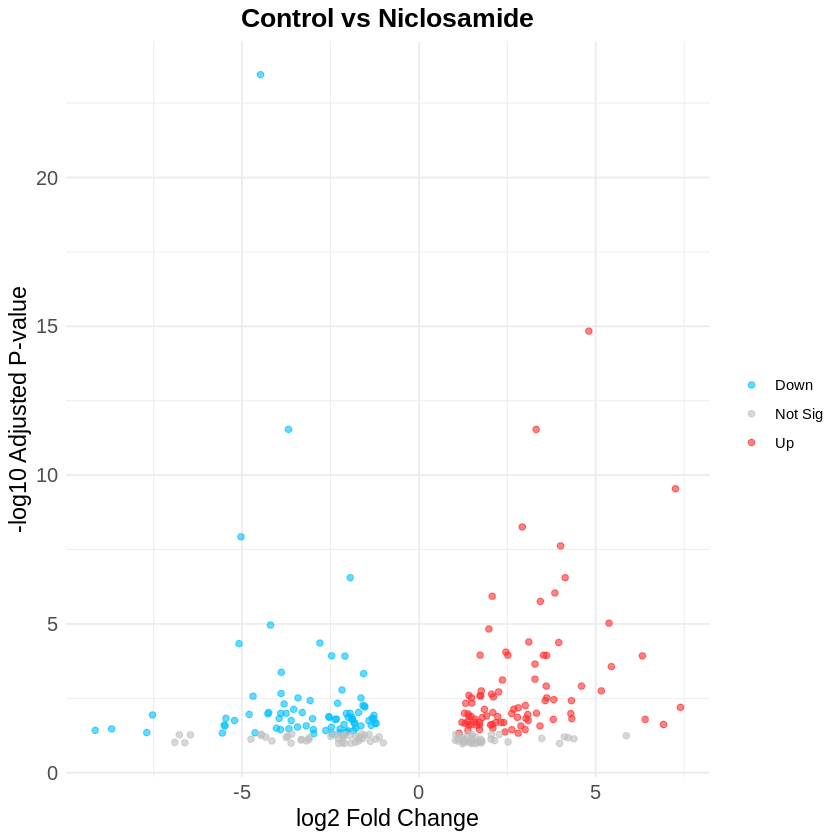

In [28]:
print(p2)

In [29]:
label_data <- subset(tg2, significance %in% c("Up", "Down") & -log10(padj) > 5)


In [30]:
p3 <- p2 +
  geom_text(data = label_data, aes(label = Symbol), size = 3, vjust = 1.5, hjust = 0.5, color = "black")


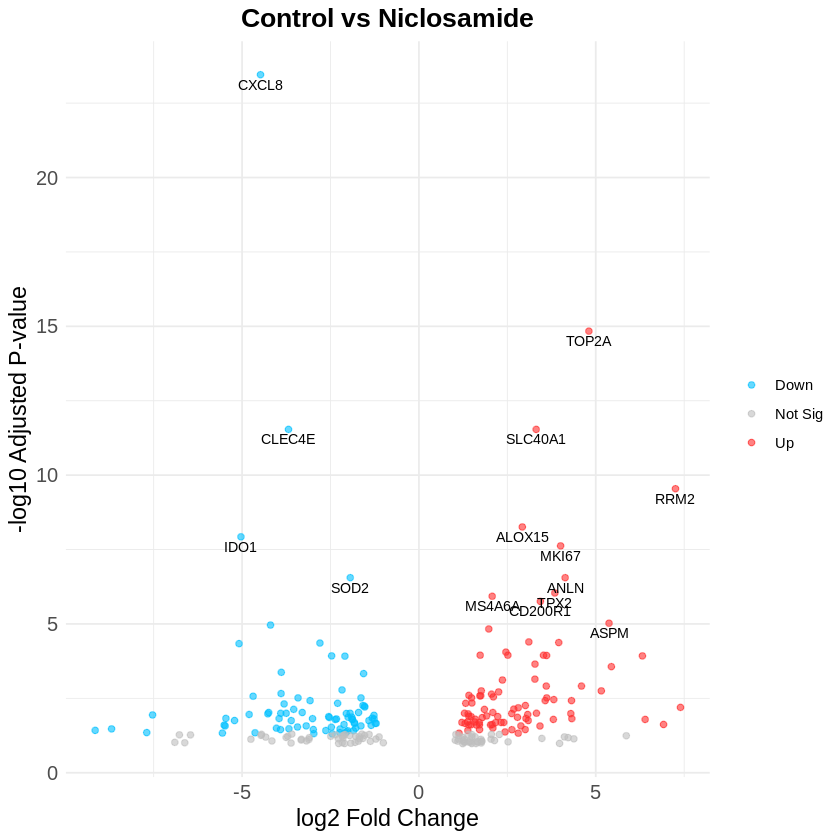

In [31]:
print(p3)

In [32]:
write.table(tg2, file = "Top250_DESeq2_genes_Alpros.txt", sep = "\t", row.names = FALSE, quote = FALSE)


In [33]:
if (!requireNamespace("pheatmap", quietly = TRUE)) {
  install.packages("pheatmap")
}

In [34]:
library(pheatmap)

In [35]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("clusterProfiler")
BiocManager::install("org.Hs.eg.db")
BiocManager::install("enrichplot")
BiocManager::install("pathview")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Installing package(s) 'clusterProfiler'

also installing the dependencies ‘polyclip’, ‘ggplot2’, ‘ggforce’, ‘HDO.db’, ‘ggraph’, ‘scatterpie’, ‘ggtree’, ‘AnnotationDbi’, ‘DOSE’, ‘enrichplot’, ‘GO.db’, ‘GOSemSim’


Old packages: 'backports', 'bit', 'brio', 'broom', 'bslib', 'cachem', 'callr',
  'curl', 'data.table', 'DBI', 'dbplyr', 'devtools', 'digest', 'farver',
  'fastmap', 'fs', 'gargle', 'ggplot2', 'gh', 'gtable', 'highr', 'htmltools',
  'httr2', 'isoband', 'knitr', 'munsell', 'openssl', 'pkgbuild', 'processx',
  'ragg', 'remotes', 'rmarkdown', 'rstudioapi', 'rvest', 'sass', 'stringi',
  'systemfonts', 'testthat', 'textshaping', 'tidyselect', 'tinytex', 'usethis',
  'whisker', 'xfun', 'xopen', 'zip', 'codetools', 'KernSmoot

In [36]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)
library(pathview)



clusterProfiler v4.12.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:clusterProfiler’:

    select


The following object is masked from ‘package:dplyr’:

    select




##############################################################################
Pathview i

In [37]:
dim(tg2)

[1] 250  10

In [38]:
# Assuming top_genes4 is already defined as in your previous code
# Separate up- and down-regulated genes
up_genes <- tg2[tg2$significance == "Up", ]
down_genes <- tg2[tg2$significance == "Down", ]

In [39]:
# Convert gene symbols to Entrez IDs
up_gene_symbols <- up_genes$Symbol
down_gene_symbols <- down_genes$Symbol

In [40]:
# Map gene symbols to Entrez IDs using org.Hs.eg.db
up_gene_entrez <- mapIds(org.Hs.eg.db, keys = up_gene_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
down_gene_entrez <- mapIds(org.Hs.eg.db, keys = down_gene_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [41]:
# Remove NAs
up_gene_entrez <- na.omit(up_gene_entrez)
down_gene_entrez <- na.omit(down_gene_entrez)

In [42]:
# Convert to character vector
up_gene_entrez <- as.character(up_gene_entrez)
down_gene_entrez <- as.character(down_gene_entrez)

In [43]:
# Perform KEGG pathway enrichment analysis
up_kegg <- enrichKEGG(gene = up_gene_entrez, organism = 'hsa')
down_kegg <- enrichKEGG(gene = down_gene_entrez, organism = 'hsa', pvalueCutoff = 0.1)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



In [44]:
# Perform GO enrichment analysis
up_go <- enrichGO(gene = up_gene_entrez, OrgDb = org.Hs.eg.db, ont = "BP", pvalueCutoff = 0.05, readable = TRUE)
down_go <- enrichGO(gene = down_gene_entrez, OrgDb = org.Hs.eg.db, ont = "BP", pvalueCutoff = 0.05, readable = TRUE)


In [45]:
# Check results
print(up_kegg)
print(down_kegg)


#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:89] "7153" "30061" "6241" "246" "4288" "54443" "22974" "64231" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...19 enriched terms found
'data.frame':	19 obs. of  11 variables:
 $ category   : chr  "Cellular Processes" "Cellular Processes" "Cellular Processes" "Cellular Processes" ...
 $ subcategory: chr  "Cell motility" "Cell growth and death" "Cell growth and death" "Cellular community - eukaryotes" ...
 $ ID         : chr  "hsa04814" "hsa04110" "hsa04115" "hsa04540" ...
 $ Description: chr  "Motor proteins" "Cell cycle" "p53 signaling pathway" "Gap junction" ...
 $ GeneRatio  : chr  "10/45" "8/45" "6/45" "5/45" ...
 $ BgRatio    : chr  "193/8779" "157/8779" "75/8779" "88/8779" ...
 $ pvalue     : num  3.41e-08 1.08e-06 1.99e-06 8.04e-05 1.20e-04 ...
 $ p.adjust   : num  6.01e-06 9.47e-05 1.16e-04 3.54e-03 3.85e-03 ...
 $ qvalue     : num  4.71e-06 7.42e-05 9.12e-05

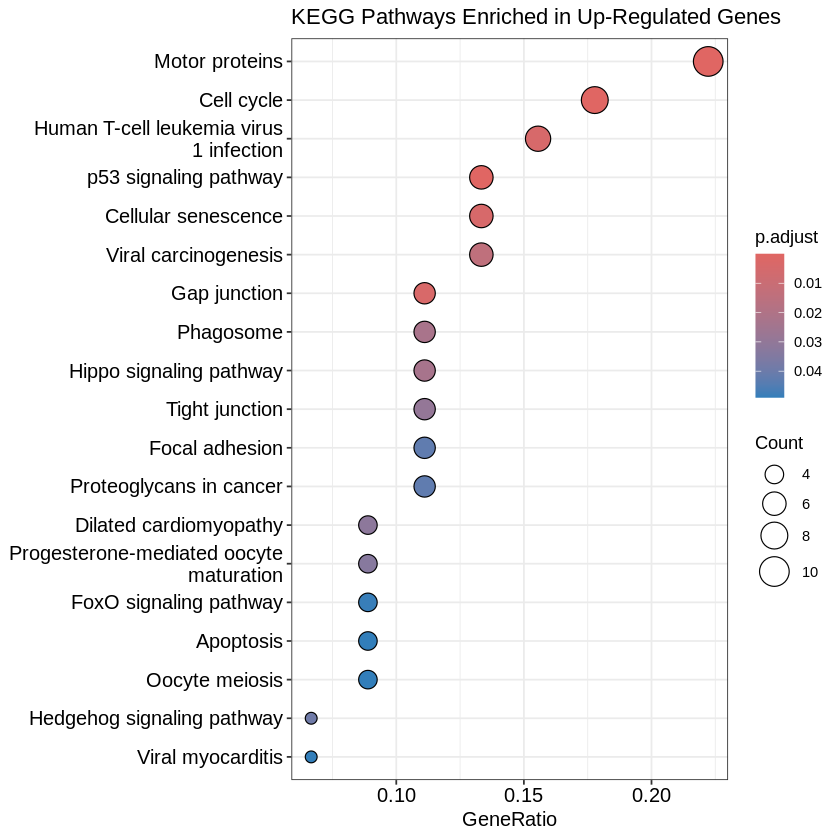

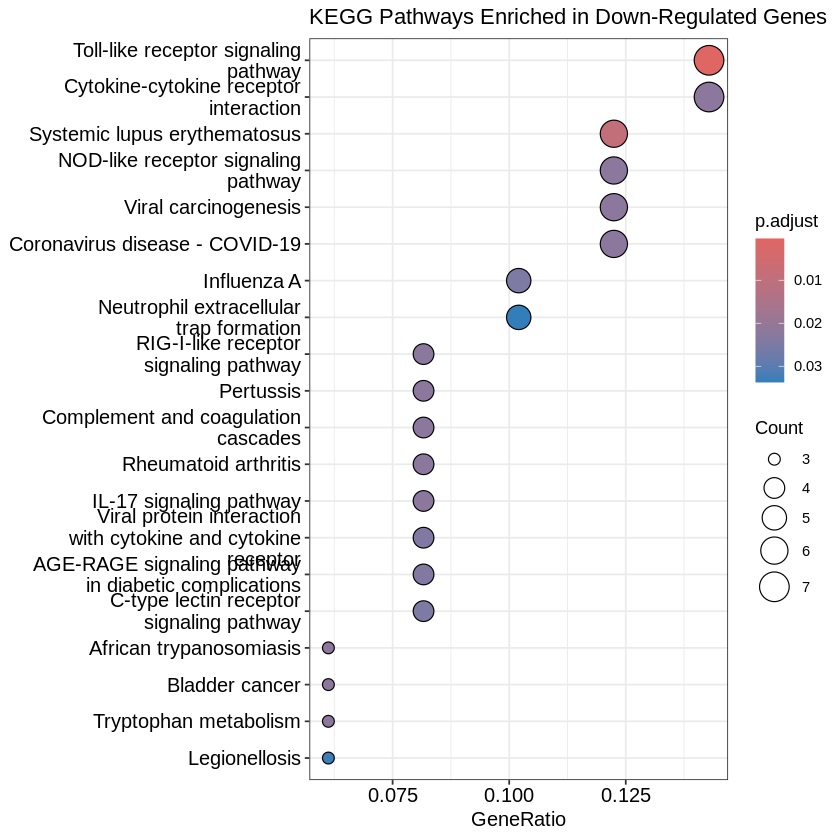

In [46]:
# Visualize KEGG enrichment results
dotplot(up_kegg, showCategory = 20) + ggtitle("KEGG Pathways Enriched in Up-Regulated Genes")
dotplot(down_kegg, showCategory = 20) + ggtitle("KEGG Pathways Enriched in Down-Regulated Genes")


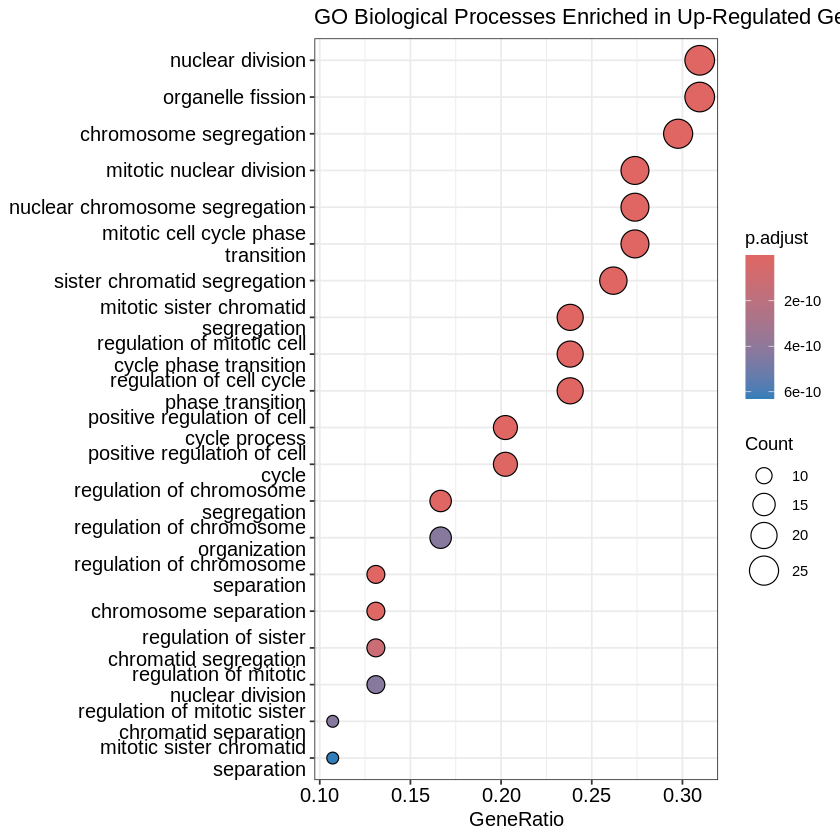

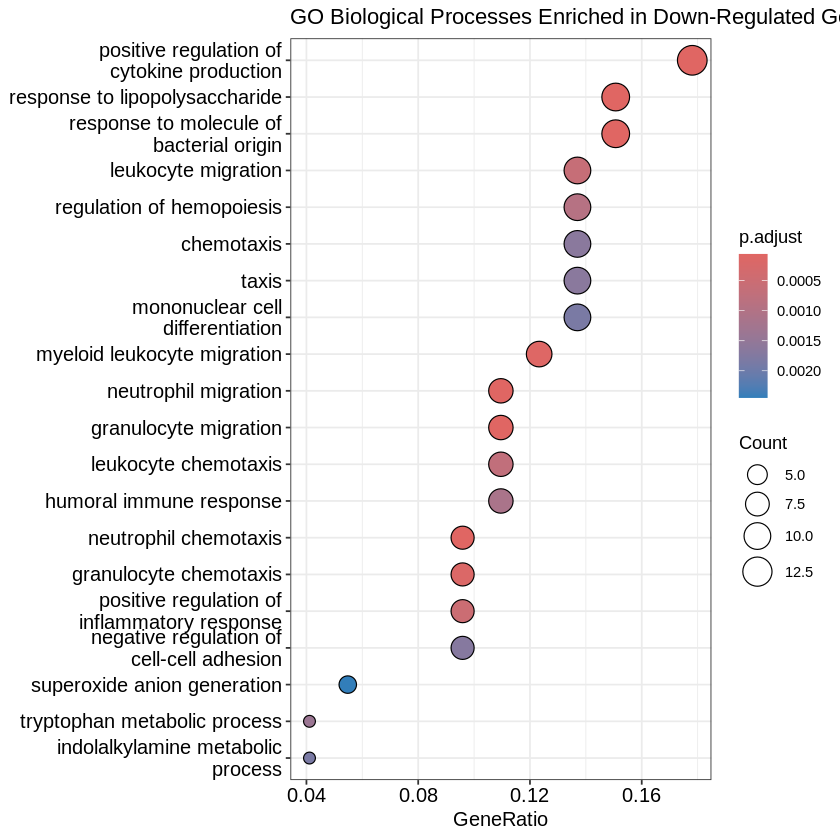

In [47]:
# Visualize GO enrichment results
dotplot(up_go, showCategory = 20) + ggtitle("GO Biological Processes Enriched in Up-Regulated Genes")
dotplot(down_go, showCategory = 20) + ggtitle("GO Biological Processes Enriched in Down-Regulated Genes")

MS275


In [72]:
# sample selection
gsmsMS <- paste0("00XXXXXXXXXXXXXXXXXX11XXXXXXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXX")
smlMS <- strsplit(gsmsMS, split="")[[1]]

In [73]:
# filter out excluded samples (marked as "X")
selMS <- which(smlMS != "X")
smlMS <- smlMS[selMS]
tblMS <- tbl[ ,selMS]

In [75]:
# group membership for samples
gsMS <- factor(smlMS)
groups <- make.names(c("Control","MS275"))
levels(gsMS) <- groups
sampleMS_info <- data.frame(Group = gsMS, row.names = colnames(tblMS))

In [76]:
# pre-filter low count genes
# keep genes with at least N counts > 10, where N = size of smallest group
keep <- rowSums( tblMS >= 10 ) >= min(table(gs))
tblMS1 <- tblMS[keep, ]

In [77]:
dsMS <- DESeqDataSetFromMatrix(countData=tblMS1, colData=sampleMS_info, design= ~Group)

dsMS <- DESeq(dsMS, test="Wald", sfType="poscount")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [78]:
# extract results for top genes table
rMS <- results (dsMS, contrast=c("Group", groups[1], groups[2]), alpha=0.05, pAdjustMethod ="fdr")

In [79]:
tgMS <- rMS[order(rMS$padj)[1:250],]
tg1MS <- merge(as.data.frame(tgMS), annot, by=0, sort=F)

In [80]:
tg2MS <- subset(tg1MS, select=c("GeneID","padj","pvalue","lfcSE","stat","log2FoldChange","baseMean","Symbol","Description"))
write.table(tg2MS, file=stdout(), row.names=F, sep="\t")

"GeneID"	"padj"	"pvalue"	"lfcSE"	"stat"	"log2FoldChange"	"baseMean"	"Symbol"	"Description"
3479	1.4612814306208e-67	1.04954494765554e-71	0.176059337013509	17.906486854297	3.15260420380865	439.555735998608	"IGF1"	"insulin like growth factor 1"
4288	5.1155532420209e-67	7.34834912306386e-71	0.255399478936643	17.7978125960665	4.54555206324742	303.87664260923	"MKI67"	"marker of proliferation Ki-67"
284119	1.48833852545106e-65	3.20693498265688e-69	0.136541375641725	-17.585050878334	-2.40108703765744	905.272696675382	"CAVIN1"	"caveolae associated protein 1"
5473	4.7512806937036e-59	1.36501635960744e-62	0.156690444747245	-16.6975746408043	-2.61635039666793	756.031698401634	"PPBP"	"pro-platelet basic protein"
23208	1.24096692694424e-57	4.45653568535604e-61	0.150880622411988	-16.4882524453184	-2.48775779143561	651.029233288539	"SYT11"	"synaptotagmin 11"
57153	8.44085266044821e-49	3.63751461342306e-52	0.175030165262637	-15.1981496062244	-2.66013463726373	452.604136942214	"SLC44A2"	"solute carrier

In [81]:
# Create a column for significance
tg2MS$significance <- ifelse(is.na(tg2MS$padj), "NA",
                           ifelse(tg2MS$padj < padj_threshold & abs(tg2MS$log2FoldChange) >= log2FC_threshold,
                                  ifelse(tg2MS$log2FoldChange > 0, "Up", "Down"), "Not Sig"))

In [82]:
# Create the volcano plot
p2MS <- ggplot(tg2MS, aes(x = log2FoldChange, y = -log10(padj), color = significance)) +
  geom_point(alpha = 0.6, size = 1.5) +
  scale_color_manual(values = c("Up" = "#FF3030", "Down" = "#00BFFF", "Not Sig" = "grey", "NA" = "black")) +
  theme_minimal() +
  labs(title = "Control vs MS275",
       x = "log2 Fold Change",
       y = "-log10 Adjusted P-value") +
  theme(legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

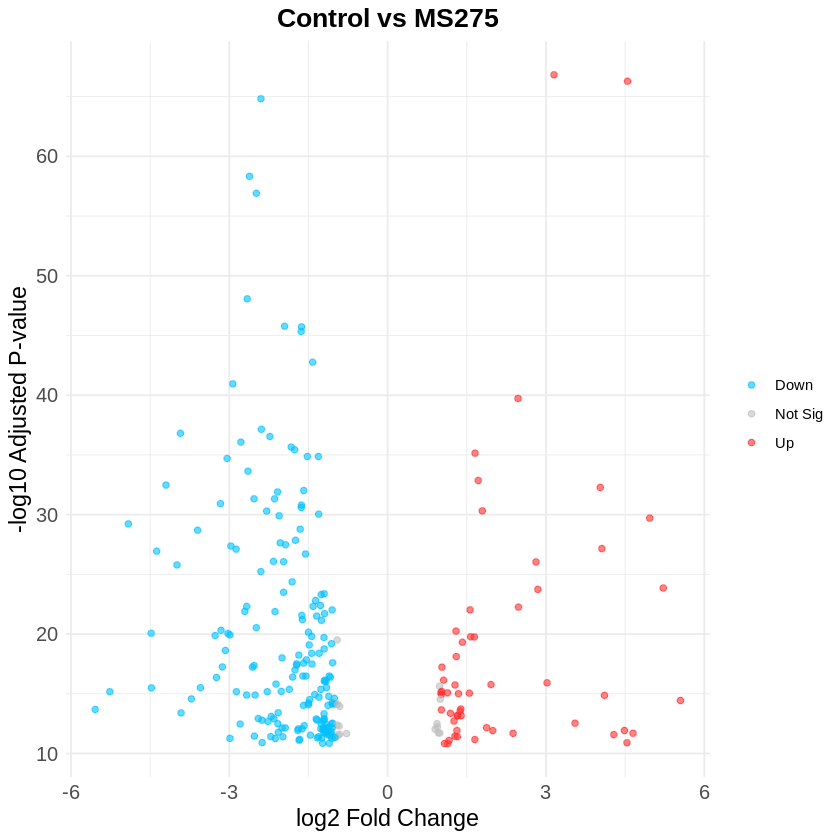

In [84]:
print(p2MS)

In [86]:
label_dataMS <- subset(tg2MS, significance %in% c("Up", "Down") & -log10(padj) > 40)

In [87]:
p3MS <- p2MS +
  geom_text(data = label_dataMS, aes(label = Symbol), size = 3, vjust = 1.5, hjust = 0.5, color = "black")

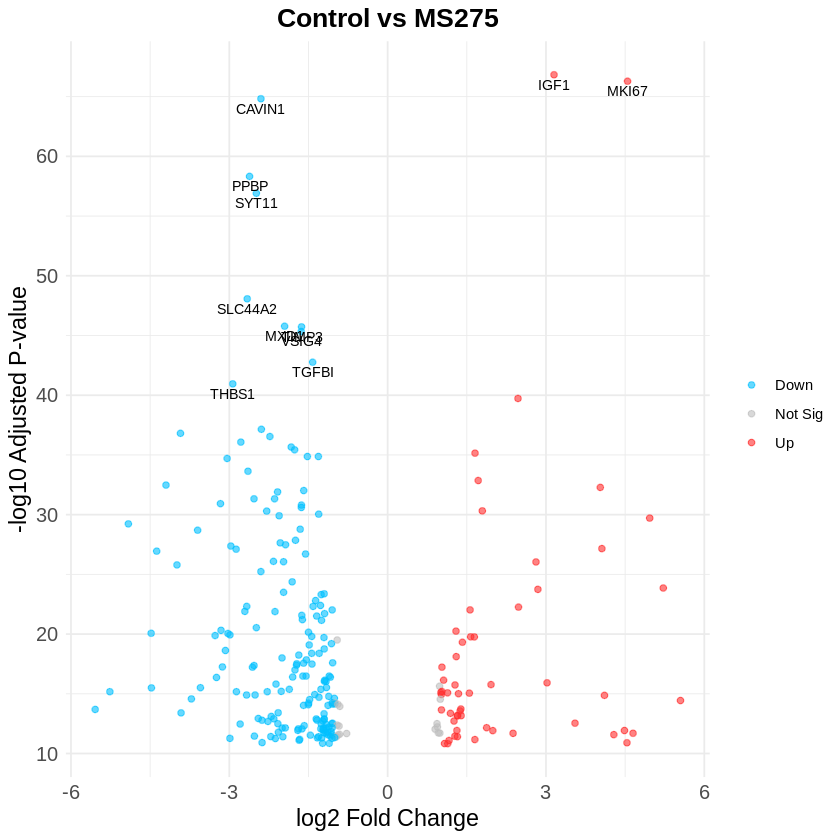

In [88]:
print(p3MS)

In [89]:
# Assuming top_genes4 is already defined as in your previous code
# Separate up- and down-regulated genes
up_genesMS <- tg2MS[tg2MS$significance == "Up", ]
down_genesMS <- tg2MS[tg2MS$significance == "Down", ]

In [90]:
# Convert gene symbols to Entrez IDs
up_geneMS_symbols <- up_genesMS$Symbol
down_geneMS_symbols <- down_genesMS$Symbol

In [91]:
# Map gene symbols to Entrez IDs using org.Hs.eg.db
up_geneMS_entrez <- mapIds(org.Hs.eg.db, keys = up_geneMS_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
down_geneMS_entrez <- mapIds(org.Hs.eg.db, keys = down_geneMS_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [92]:
# Remove NAs
up_geneMS_entrez <- na.omit(up_geneMS_entrez)
down_geneMS_entrez <- na.omit(down_geneMS_entrez)

In [93]:
# Convert to character vector
up_geneMS_entrez <- as.character(up_geneMS_entrez)
down_geneMS_entrez <- as.character(down_geneMS_entrez)

In [94]:
# Perform KEGG pathway enrichment analysis
up_keggMS <- enrichKEGG(gene = up_geneMS_entrez, organism = 'hsa')
down_keggMS <- enrichKEGG(gene = down_geneMS_entrez, organism = 'hsa', pvalueCutoff = 0.1)

In [95]:
# Check results
print(up_keggMS)
print(down_keggMS)


#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:55] "3479" "4288" "2681" "23397" "929" "7153" "55256" "1063" "4173" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...4 enriched terms found
'data.frame':	4 obs. of  11 variables:
 $ category   : chr  "Cellular Processes" "Cellular Processes" "Genetic Information Processing" "Cellular Processes"
 $ subcategory: chr  "Cell growth and death" "Cell growth and death" "Replication and repair" "Cell growth and death"
 $ ID         : chr  "hsa04110" "hsa04115" "hsa03030" "hsa04114"
 $ Description: chr  "Cell cycle" "p53 signaling pathway" "DNA replication" "Oocyte meiosis"
 $ GeneRatio  : chr  "8/32" "5/32" "3/32" "4/32"
 $ BgRatio    : chr  "157/8779" "75/8779" "36/8779" "138/8779"
 $ pvalue     : num  6.39e-08 6.69e-06 2.89e-04 1.49e-03
 $ p.adjust   : num  7.74e-06 4.05e-04 1.17e-02 4.52e-02
 $ qvalue     : num  6.73e-06 3.52e-04 1.02e-02 3.93e-02
 $ geneID     : chr  "41

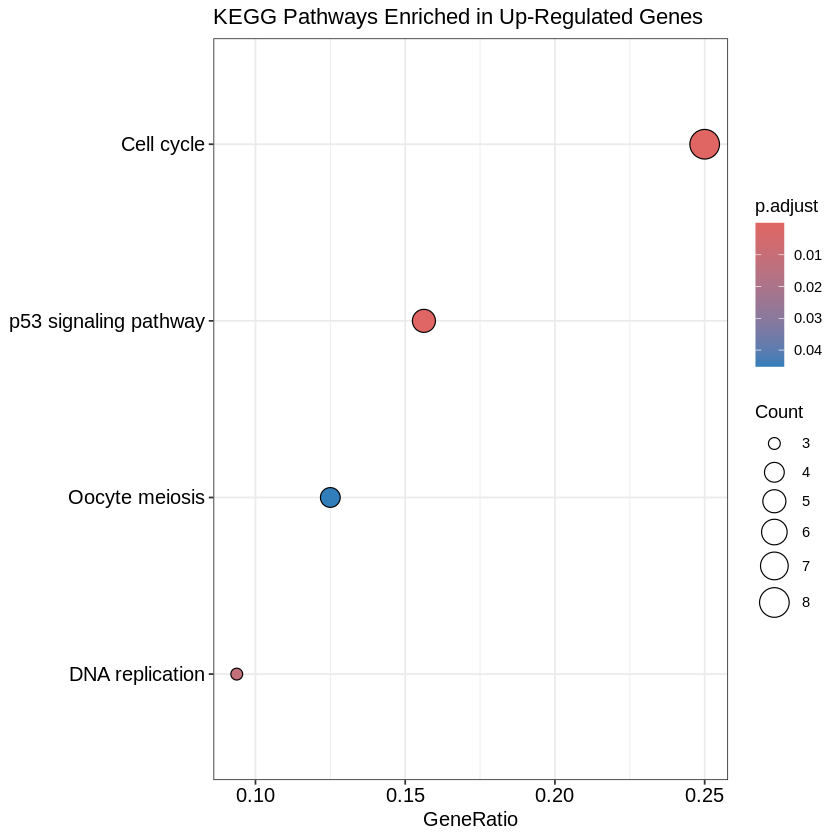

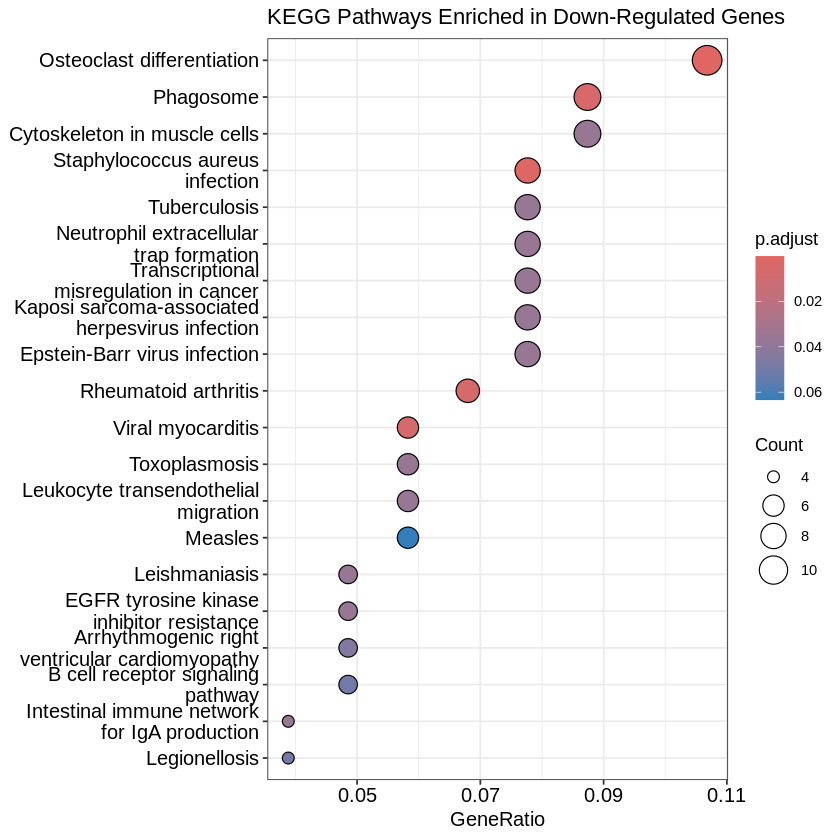

In [96]:
# Visualize KEGG enrichment results
dotplot(up_keggMS, showCategory = 20) + ggtitle("KEGG Pathways Enriched in Up-Regulated Genes")
dotplot(down_keggMS, showCategory = 20) + ggtitle("KEGG Pathways Enriched in Down-Regulated Genes")

DPI

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



"GeneID"	"padj"	"pvalue"	"lfcSE"	"stat"	"log2FoldChange"	"baseMean"	"Symbol"	"Description"
55959	9.93880415267674e-188	7.47840794031357e-192	0.125191272294164	-29.5456070919004	-3.69885214253847	1511.54880124091	"SULF2"	"sulfatase 2"
3099	1.82684507032789e-166	4.12380377049186e-170	0.0940096109520313	-27.8018167572694	-2.61363797711056	4953.69551017881	"HK2"	"hexokinase 2"
6515	1.82684507032789e-166	2.80824257810534e-170	0.121880285432004	-27.815615387457	-3.39017514289011	1503.89093302989	"SLC2A3"	"solute carrier family 2 member 3"
10397	1.60495231438587e-135	4.83055625097326e-139	0.116965257717862	-25.1011585415247	-2.93596347782634	1842.77614962784	"NDRG1"	"N-myc downstream regulated 1"
54541	1.91198485605346e-115	7.19332150509201e-119	0.20800612444231	-23.1803160345827	-4.82164770170147	612.324492292442	"DDIT4"	"DNA damage inducible transcript 4"
5033	3.45194115128361e-97	1.55843844301743e-100	0.12256264301091	-21.2851511035757	-2.60876437614082	1602.94771129525	"P4HA1"	"prolyl 4-h

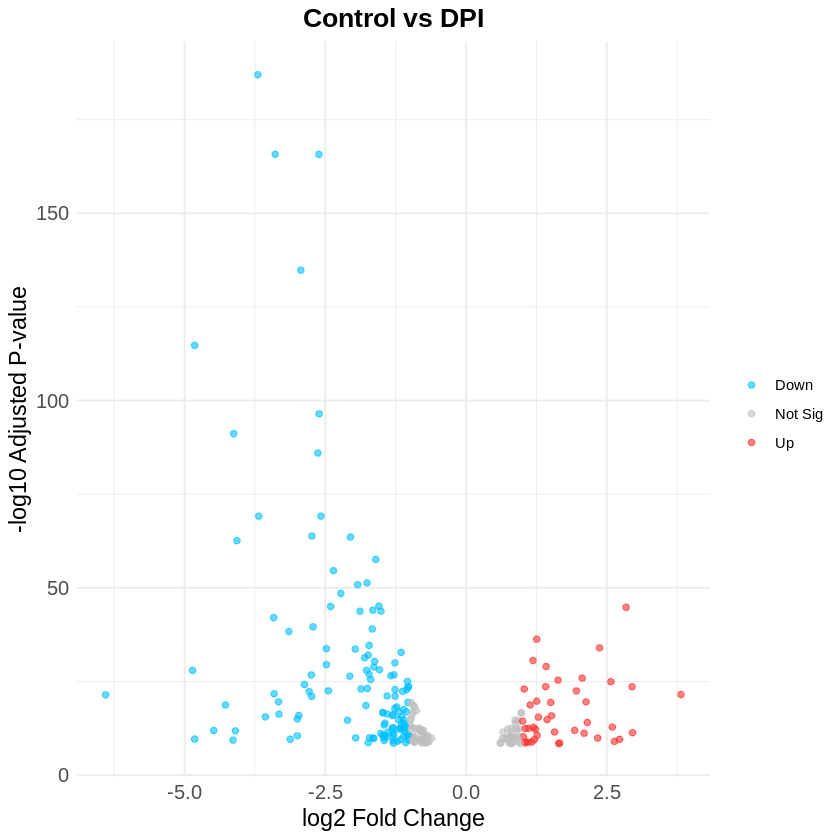

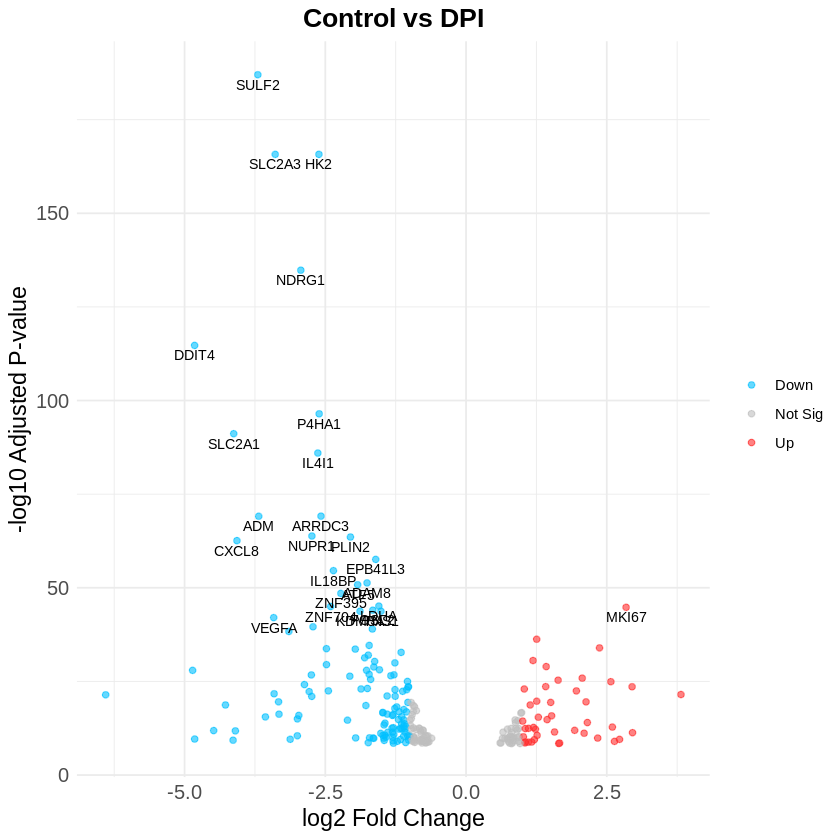

In [97]:
# Visualize KE# sample selection
gsmsDPI <- paste0("00XXXXXXXXXXXXXXXXXXXXXX11XXXXXXXXXXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXX")
smlDPI <- strsplit(gsmsDPI, split="")[[1]]

# filter out excluded samples (marked as "X")
selDPI <- which(smlDPI != "X")
smlDPI <- smlDPI[selDPI]
tblDPI <- tbl[ ,selDPI]

# group membership for samples
gsDPI <- factor(smlDPI)
groups <- make.names(c("Control","DPI"))
levels(gsDPI) <- groups
sampleDPI_info <- data.frame(Group = gsDPI, row.names = colnames(tblDPI))

# pre-filter low count genes
# keep genes with at least N counts > 10, where N = size of smallest group
keep <- rowSums( tblDPI >= 10 ) >= min(table(gs))
tblDPI1 <- tblDPI[keep, ]

dsDPI <- DESeqDataSetFromMatrix(countData=tblDPI1, colData=sampleDPI_info, design= ~Group)

dsDPI <- DESeq(dsDPI, test="Wald", sfType="poscount")

# extract results for top genes table
rDPI <- results (dsDPI, contrast=c("Group", groups[1], groups[2]), alpha=0.05, pAdjustMethod ="fdr")

tgDPI <- rDPI[order(rDPI$padj)[1:250],]
tg1DPI <- merge(as.data.frame(tgDPI), annot, by=0, sort=F)

tg2DPI <- subset(tg1DPI, select=c("GeneID","padj","pvalue","lfcSE","stat","log2FoldChange","baseMean","Symbol","Description"))
write.table(tg2DPI, file=stdout(), row.names=F, sep="\t")

# Create a column for significance
tg2DPI$significance <- ifelse(is.na(tg2DPI$padj), "NA",
                           ifelse(tg2DPI$padj < padj_threshold & abs(tg2DPI$log2FoldChange) >= log2FC_threshold,
                                  ifelse(tg2DPI$log2FoldChange > 0, "Up", "Down"), "Not Sig"))

# Create the volcano plot
p2DPI <- ggplot(tg2DPI, aes(x = log2FoldChange, y = -log10(padj), color = significance)) +
  geom_point(alpha = 0.6, size = 1.5) +
  scale_color_manual(values = c("Up" = "#FF3030", "Down" = "#00BFFF", "Not Sig" = "grey", "NA" = "black")) +
  theme_minimal() +
  labs(title = "Control vs DPI",
       x = "log2 Fold Change",
       y = "-log10 Adjusted P-value") +
  theme(legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

print(p2DPI)

label_dataDPI <- subset(tg2DPI, significance %in% c("Up", "Down") & -log10(padj) > 40)

p3DPI <- p2DPI +
  geom_text(data = label_dataDPI, aes(label = Symbol), size = 3, vjust = 1.5, hjust = 0.5, color = "black")

print(p3DPI)


In [98]:
write.table(tg2MS, file = "Top250_DESeq2_genes_MS275.txt", sep = "\t", row.names = FALSE, quote = FALSE)
write.table(tg2DPI, file = "Top250_DESeq2_genes_DPI.txt", sep = "\t", row.names = FALSE, quote = FALSE)



'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:43] "4288" "6367" "30061" "9332" "6614" "6357" "3479" "3762" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...0 enriched terms found
#...Citation
 T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu.
 clusterProfiler 4.0: A universal enrichment tool for interpreting omics data.
 The Innovation. 2021, 2(3):100141 

#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:128] "55959" "3099" "6515" "10397" "54541" "5033" "6513" "259307" ...
#...pvalues adjusted by 'BH' with cutoff <0.1 
#...21 enriched terms found
'data.frame':	21 obs. of  11 variables:
 $ category   : chr  "Environmental Information Processing" "Metabolism" "Metabolism" "Human Diseases" ...
 $ subcategory: chr  "Signal transduction" "Carbohydrate metabolism" "Carbohydrate metabolism" "Cancer: speci

Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr

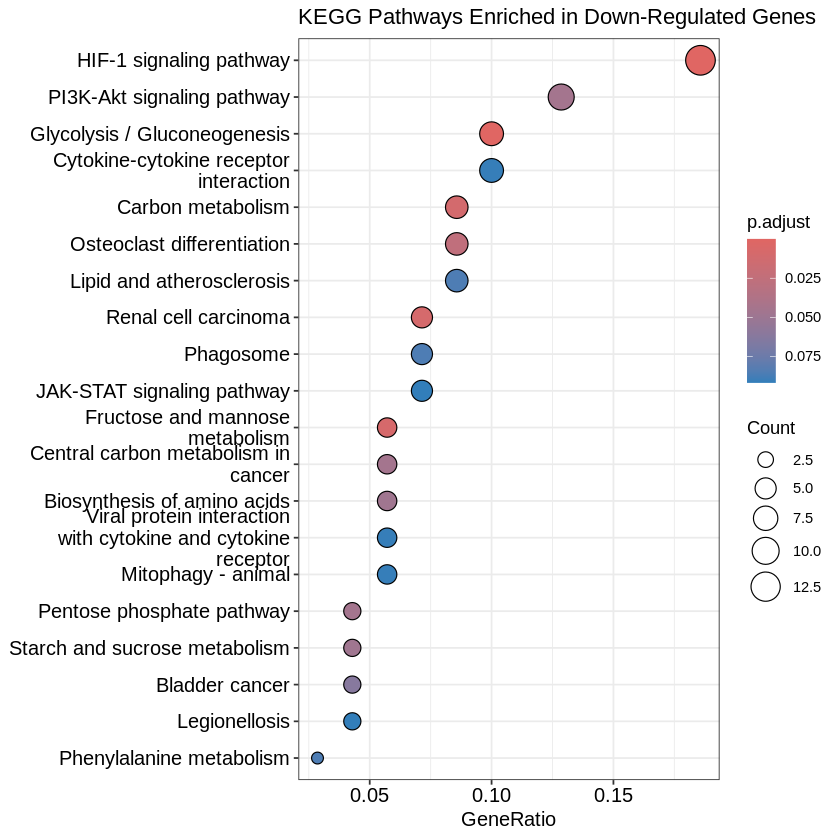

In [99]:
# Assuming top_genes4 is already defined as in your previous code
# Separate up- and down-regulated genes
up_genesDPI <- tg2DPI[tg2DPI$significance == "Up", ]
down_genesDPI <- tg2DPI[tg2DPI$significance == "Down", ]

# Convert gene symbols to Entrez IDs
up_geneDPI_symbols <- up_genesDPI$Symbol
down_geneDPI_symbols <- down_genesDPI$Symbol
# Map gene symbols to Entrez IDs using org.Hs.eg.db
up_geneDPI_entrez <- mapIds(org.Hs.eg.db, keys = up_geneDPI_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
down_geneDPI_entrez <- mapIds(org.Hs.eg.db, keys = down_geneDPI_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
# Remove NAs
up_geneDPI_entrez <- na.omit(up_geneDPI_entrez)
down_geneDPI_entrez <- na.omit(down_geneDPI_entrez)
# Convert to character vector
up_geneDPI_entrez <- as.character(up_geneDPI_entrez)
down_geneDPI_entrez <- as.character(down_geneDPI_entrez)
# Perform KEGG pathway enrichment analysis
up_keggDPI <- enrichKEGG(gene = up_geneDPI_entrez, organism = 'hsa')
down_keggDPI <- enrichKEGG(gene = down_geneDPI_entrez, organism = 'hsa', pvalueCutoff = 0.1)
# Check results
print(up_keggDPI)
print(down_keggDPI)

# Visualize KEGG enrichment results
dotplot(up_keggDPI, showCategory = 20) + ggtitle("KEGG Pathways Enriched in Up-Regulated Genes")
dotplot(down_keggDPI, showCategory = 20) + ggtitle("KEGG Pathways Enriched in Down-Regulated Genes")




estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



"GeneID"	"padj"	"pvalue"	"lfcSE"	"stat"	"log2FoldChange"	"baseMean"	"Symbol"	"Description"
23022	0	0	0.105937685000637	-46.2387863965542	-4.8984299880899	4361.82671351763	"PALLD"	"palladin, cytoskeletal associated protein"
9332	0	0	0.104776020479851	38.5276206804064	4.03677077345019	6005.74743495471	"CD163"	"CD163 molecule"
6367	3.62480712063595e-273	8.2947531364667e-277	0.0907577305087809	35.5500471184146	3.22644159594753	7683.9814526031	"CCL22"	"C-C motif chemokine ligand 22"
2162	6.8898815812983e-246	2.10217592106737e-249	0.105823199657261	33.7299765743359	3.56941404546068	5871.50788793511	"F13A1"	"coagulation factor XIII A chain"
23657	4.5769196044787e-229	1.74558337318028e-232	0.107541101583128	-32.5555823555879	-3.50106318920016	5120.53843806373	"SLC7A11"	"solute carrier family 7 member 11"
51232	7.08538143550968e-198	3.2427374990891e-201	0.112262885001354	-30.2656997501985	-3.39771477054206	1856.3267623689	"CRIM1"	"cysteine rich transmembrane BMP regulator 1"
6510	8.576616986222

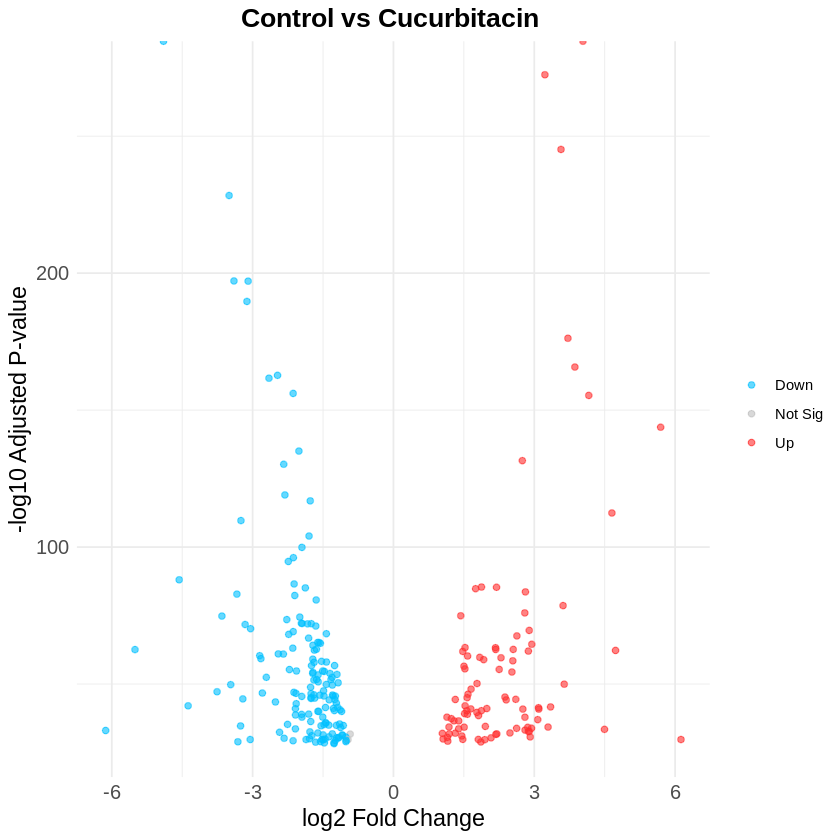

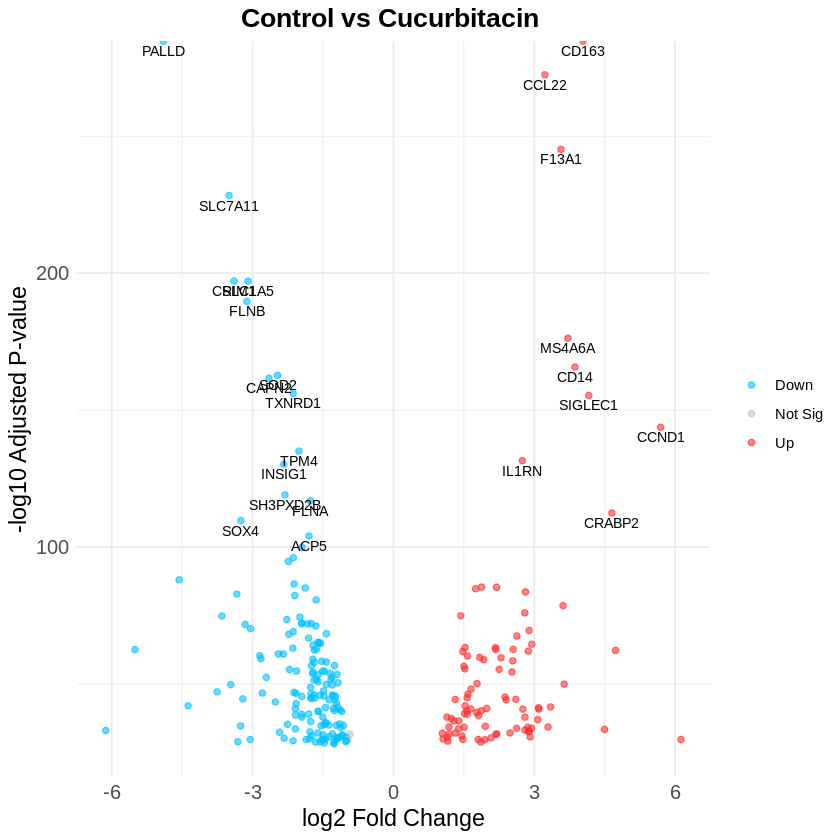

In [101]:
# Visualize KE# sample selection
gsmsCUCUR <- paste0("00XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX11XXXXXXXXXXXXXXXX",
        "XXXXXXXXXXXXXXXXXXXXXXXXXX")
smlCUCUR <- strsplit(gsmsCUCUR, split="")[[1]]

# filter out excluded samples (marked as "X")
selCUCUR <- which(smlCUCUR != "X")
smlCUCUR <- smlCUCUR[selCUCUR]
tblCUCUR <- tbl[ ,selCUCUR]

# group membership for samples
gsCUCUR <- factor(smlCUCUR)
groups <- make.names(c("Control","Cucurbitacin"))
levels(gsCUCUR) <- groups
sampleCUCUR_info <- data.frame(Group = gsCUCUR, row.names = colnames(tblCUCUR))

# pre-filter low count genes
# keep genes with at least N counts > 10, where N = size of smallest group
keep <- rowSums( tblCUCUR >= 10 ) >= min(table(gs))
tblCUCUR1 <- tblCUCUR[keep, ]

dsCUCUR <- DESeqDataSetFromMatrix(countData=tblCUCUR1, colData=sampleCUCUR_info, design= ~Group)

dsCUCUR <- DESeq(dsCUCUR, test="Wald", sfType="poscount")

# extract results for top genes table
rCUCUR <- results (dsCUCUR, contrast=c("Group", groups[1], groups[2]), alpha=0.05, pAdjustMethod ="fdr")

tgCUCUR <- rCUCUR[order(rCUCUR$padj)[1:250],]
tg1CUCUR <- merge(as.data.frame(tgCUCUR), annot, by=0, sort=F)

tg2CUCUR <- subset(tg1CUCUR, select=c("GeneID","padj","pvalue","lfcSE","stat","log2FoldChange","baseMean","Symbol","Description"))
write.table(tg2CUCUR, file=stdout(), row.names=F, sep="\t")

# Create a column for significance
tg2CUCUR$significance <- ifelse(is.na(tg2CUCUR$padj), "NA",
                           ifelse(tg2CUCUR$padj < padj_threshold & abs(tg2CUCUR$log2FoldChange) >= log2FC_threshold,
                                  ifelse(tg2CUCUR$log2FoldChange > 0, "Up", "Down"), "Not Sig"))

# Create the volcano plot
p2CUCUR <- ggplot(tg2CUCUR, aes(x = log2FoldChange, y = -log10(padj), color = significance)) +
  geom_point(alpha = 0.6, size = 1.5) +
  scale_color_manual(values = c("Up" = "#FF3030", "Down" = "#00BFFF", "Not Sig" = "grey", "NA" = "black")) +
  theme_minimal() +
  labs(title = "Control vs Cucurbitacin ",
       x = "log2 Fold Change",
       y = "-log10 Adjusted P-value") +
  theme(legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

print(p2CUCUR)

label_dataCUCUR <- subset(tg2CUCUR, significance %in% c("Up", "Down") & -log10(padj) > 100)

p3CUCUR <- p2CUCUR +
  geom_text(data = label_dataCUCUR, aes(label = Symbol), size = 3, vjust = 1.5, hjust = 0.5, color = "black")

print(p3CUCUR)


'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 kegg 
#...@gene 	 chr [1:92] "9332" "6367" "2162" "64231" "929" "6614" "595" "3557" "1382" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...63 enriched terms found
'data.frame':	63 obs. of  11 variables:
 $ category   : chr  "Human Diseases" "Cellular Processes" "Human Diseases" "Human Diseases" ...
 $ subcategory: chr  "Infectious disease: bacterial" "Transport and catabolism" "Infectious disease: bacterial" "Infectious disease: parasitic" ...
 $ ID         : chr  "hsa05152" "hsa04145" "hsa05150" "hsa05140" ...
 $ Description: chr  "Tuberculosis" "Phagosome" "Staphylococcus aureus infection" "Leishmaniasis" ...
 $ GeneRatio  : chr  "15/54" "13/54" "9/54" "8/54" ...
 $ BgRatio    : chr  "180/8779" "152/8779" "96/8779" "77/8779" ...
 $ pvalue     : num  1.14e-13 4.51e-12 5.42e-09 1.82e-08 2.02e-08 ...
 $ p.adjust   : num  2.45e-11 4.85e-10 3.88e-07 8.67e-07 8.67e-07 ...
 $ qvalue     : num  1

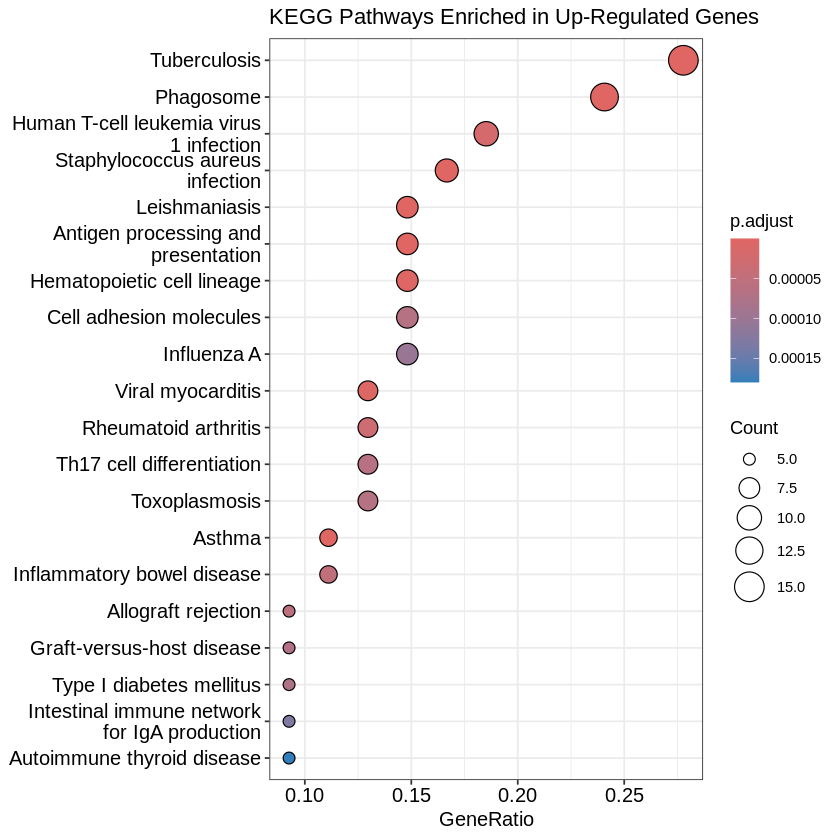

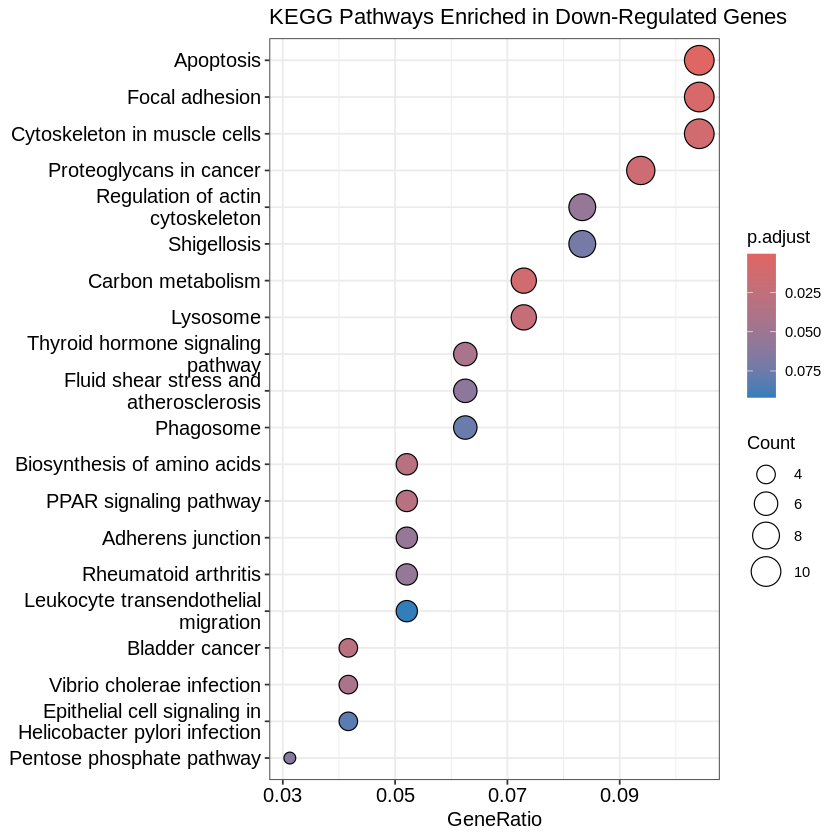

In [102]:
# Assuming top_genes4 is already defined as in your previous code
# Separate up- and down-regulated genes
up_genesCUCUR <- tg2CUCUR[tg2CUCUR$significance == "Up", ]
down_genesCUCUR <- tg2CUCUR[tg2CUCUR$significance == "Down", ]

# Convert gene symbols to Entrez IDs
up_geneCUCUR_symbols <- up_genesCUCUR$Symbol
down_geneCUCUR_symbols <- down_genesCUCUR$Symbol
# Map gene symbols to Entrez IDs using org.Hs.eg.db
up_geneCUCUR_entrez <- mapIds(org.Hs.eg.db, keys = up_geneCUCUR_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
down_geneCUCUR_entrez <- mapIds(org.Hs.eg.db, keys = down_geneCUCUR_symbols, column = "ENTREZID", keytype = "SYMBOL", multiVals = "first")
# Remove NAs
up_geneCUCUR_entrez <- na.omit(up_geneCUCUR_entrez)
down_geneCUCUR_entrez <- na.omit(down_geneCUCUR_entrez)
# Convert to character vector
up_geneCUCUR_entrez <- as.character(up_geneCUCUR_entrez)
down_geneCUCUR_entrez <- as.character(down_geneCUCUR_entrez)
# Perform KEGG pathway enrichment analysis
up_keggCUCUR <- enrichKEGG(gene = up_geneCUCUR_entrez, organism = 'hsa')
down_keggCUCUR <- enrichKEGG(gene = down_geneCUCUR_entrez, organism = 'hsa', pvalueCutoff = 0.1)
# Check results
print(up_keggCUCUR)
print(down_keggCUCUR)

# Visualize KEGG enrichment results
dotplot(up_keggCUCUR, showCategory = 20) + ggtitle("KEGG Pathways Enriched in Up-Regulated Genes")
dotplot(down_keggCUCUR, showCategory = 20) + ggtitle("KEGG Pathways Enriched in Down-Regulated Genes")


In [103]:
write.table(tg2CUCUR, file = "Top250_DESeq2_genes_CUCUR.txt", sep = "\t", row.names = FALSE, quote = FALSE)

